# Assignment8

In [551]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [552]:
df = pd.read_csv("car_data.csv")

Find the linear regression equation for mileage vs price.

In [553]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [554]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [555]:
df.drop_duplicates()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [556]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [557]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [558]:
df[['Mileage','Price']].describe()

,Mileage,Price
count,804.000000,804.000000
mean,19831.934080,21343.143767
std,8196.319707,9884.852801
min,266.000000,8638.930895
25%,14623.500000,14273.073870
50%,20913.500000,18024.995019
75%,25213.000000,26717.316636
max,50387.000000,70755.466717


In [559]:
iqr = df['Mileage'].quantile(0.75)-df['Mileage'].quantile(0.25)
upper = df['Mileage'].quantile(0.75)+(1.5*iqr)
lower = df['Mileage'].quantile(0.25)-(1.5*iqr)
upper,lower

(41097.25, -1260.75)

In [560]:
df.Mileage.clip(lower , upper , inplace = True)

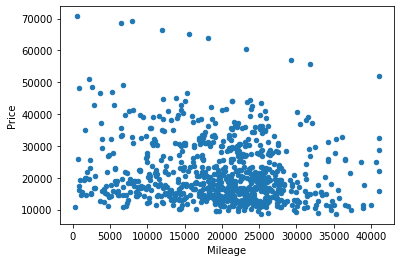

In [561]:
df.plot(x='Mileage',y = 'Price',kind = 'scatter')

In [562]:
df[['Mileage','Price']].corr()

,Mileage,Price
Mileage,1.000000,-0.146283
Price,-0.146283,1.000000


the correlation between mileage vs price is less than -2 so is not fit for linear regression

In [563]:
x = df.loc[:,['Mileage']].values
y = df.loc[:,'Price'].values

In [564]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.25)

In [565]:
from sklearn.linear_model import LinearRegression
A = LinearRegression()
A.fit(x_train,y_train)

LinearRegression()

Chart the original data and the equation on the chart.

In [566]:
temp = df[['Mileage']].values

In [567]:
pred = A.predict(temp)

In [568]:
df1 = pd.DataFrame({'Mileage': df['Mileage'] , 'pred_price': pred})

In [569]:
df.sort_values(by = 'Mileage', inplace = True )

In [570]:
df1.sort_values(by = 'Mileage', inplace = True)

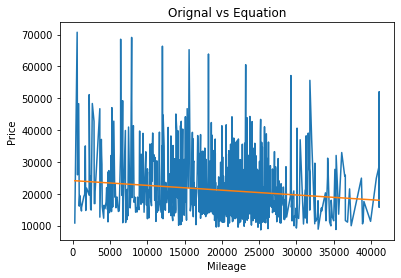

In [571]:
plt.plot(df['Mileage'],df['Price'])
plt.plot(df1['Mileage'],df1['pred_price'])
plt.title('Orignal vs Equation')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data.

In [572]:
y_pred = A.predict(x_test)

In [573]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.03238532440277775


Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [574]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [575]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [576]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19807.086132,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8119.836852,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,41097.250000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


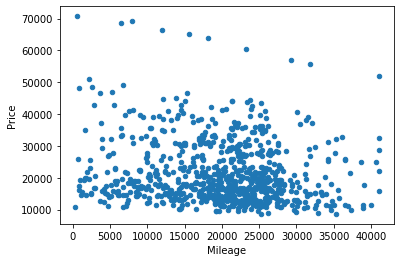

In [577]:
df.plot(x='Mileage',y = 'Price',kind = 'scatter')

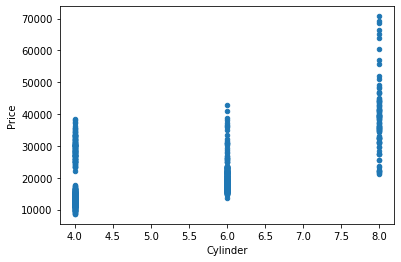

In [578]:
df.plot(x='Cylinder',y = 'Price',kind = 'scatter')

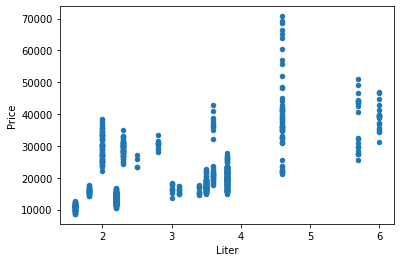

In [579]:
df.plot(x='Liter',y = 'Price',kind = 'scatter')

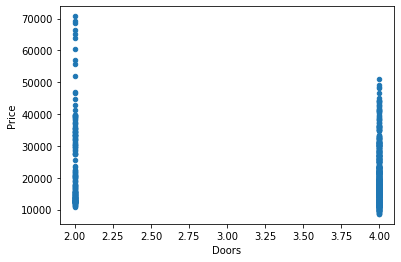

In [580]:
df.plot(x='Doors',y = 'Price',kind = 'scatter')

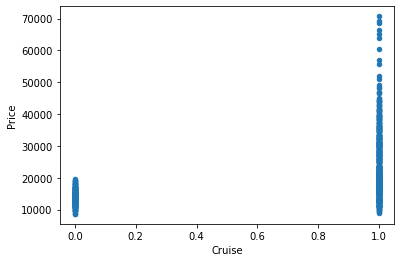

In [581]:
df.plot(x='Cruise',y = 'Price',kind = 'scatter')

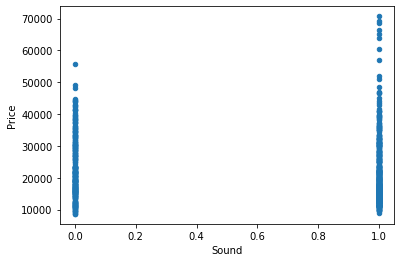

In [582]:
df.plot(x='Sound',y = 'Price',kind = 'scatter')

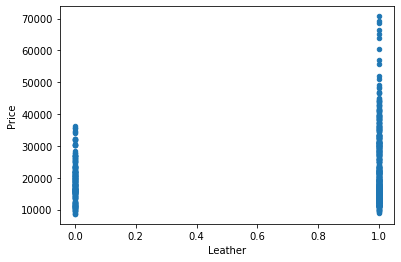

In [583]:
df.plot(x='Leather',y = 'Price',kind = 'scatter')

In [584]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.146283,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.146283,1.000000,-0.028069,-0.016878,-0.015384,0.023516,-0.025447,-0.000876
Cylinder,0.569086,-0.028069,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.016878,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.015384,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.023516,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.025447,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,-0.000876,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [585]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [586]:
x = df.loc[:,['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound','Leather']].values
y = df.loc[:,'Price'].values

In [587]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.25)

In [588]:
from sklearn.linear_model import LinearRegression
A = LinearRegression()
A.fit(x_train,y_train)

LinearRegression()

Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data.

In [589]:
y_pred = A.predict(x_test)

In [590]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.3687293396950615


Find the combination of the factors that is the best predictor for price.

In [591]:
from itertools import combinations

In [592]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [593]:
S = list(combinations(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound','Leather'],2))

In [594]:
S

[('Mileage', 'Cylinder'),
 ('Mileage', 'Liter'),
 ('Mileage', 'Doors'),
 ('Mileage', 'Cruise'),
 ('Mileage', 'Sound'),
 ('Mileage', 'Leather'),
 ('Cylinder', 'Liter'),
 ('Cylinder', 'Doors'),
 ('Cylinder', 'Cruise'),
 ('Cylinder', 'Sound'),
 ('Cylinder', 'Leather'),
 ('Liter', 'Doors'),
 ('Liter', 'Cruise'),
 ('Liter', 'Sound'),
 ('Liter', 'Leather'),
 ('Doors', 'Cruise'),
 ('Doors', 'Sound'),
 ('Doors', 'Leather'),
 ('Cruise', 'Sound'),
 ('Cruise', 'Leather'),
 ('Sound', 'Leather')]

In [595]:
D = []
for i in S:
  x = df.loc[:,i].values
  y = df.loc[:,'Price'].values
  from sklearn.model_selection import train_test_split
  x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.25)
  from sklearn.linear_model import LinearRegression
  A = LinearRegression()
  A.fit(x_train,y_train)
  y_pred = A.predict(x_test)
  from sklearn import metrics
  D.append(metrics.r2_score(y_test,y_pred))

In [596]:
D

[0.19712206198404314,
 0.31419238582101283,
 -0.009848416035804775,
 0.22544190315779877,
 0.023051765733643315,
 0.034018418909134374,
 0.31399630934988265,
 0.3436539063180095,
 0.36550274064773125,
 0.2540809742142164,
 0.39697994913860524,
 0.27337767144449443,
 0.32903212007817917,
 0.2506847644985202,
 0.3225318975114142,
 0.18641640992252628,
 0.04198179068431551,
 0.03417495429431927,
 0.19332671793369038,
 0.1976396425343564,
 0.0659160428979002]

In [597]:
f = pd.DataFrame({'comb': S,'r2_score':D})

In [598]:
r = f['r2_score'].max()

In [599]:
T = D.index(r)

In [600]:
S[T]

('Cylinder', 'Leather')

In [601]:
S = list(combinations(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound','Leather'],3))

In [602]:
S

[('Mileage', 'Cylinder', 'Liter'),
 ('Mileage', 'Cylinder', 'Doors'),
 ('Mileage', 'Cylinder', 'Cruise'),
 ('Mileage', 'Cylinder', 'Sound'),
 ('Mileage', 'Cylinder', 'Leather'),
 ('Mileage', 'Liter', 'Doors'),
 ('Mileage', 'Liter', 'Cruise'),
 ('Mileage', 'Liter', 'Sound'),
 ('Mileage', 'Liter', 'Leather'),
 ('Mileage', 'Doors', 'Cruise'),
 ('Mileage', 'Doors', 'Sound'),
 ('Mileage', 'Doors', 'Leather'),
 ('Mileage', 'Cruise', 'Sound'),
 ('Mileage', 'Cruise', 'Leather'),
 ('Mileage', 'Sound', 'Leather'),
 ('Cylinder', 'Liter', 'Doors'),
 ('Cylinder', 'Liter', 'Cruise'),
 ('Cylinder', 'Liter', 'Sound'),
 ('Cylinder', 'Liter', 'Leather'),
 ('Cylinder', 'Doors', 'Cruise'),
 ('Cylinder', 'Doors', 'Sound'),
 ('Cylinder', 'Doors', 'Leather'),
 ('Cylinder', 'Cruise', 'Sound'),
 ('Cylinder', 'Cruise', 'Leather'),
 ('Cylinder', 'Sound', 'Leather'),
 ('Liter', 'Doors', 'Cruise'),
 ('Liter', 'Doors', 'Sound'),
 ('Liter', 'Doors', 'Leather'),
 ('Liter', 'Cruise', 'Sound'),
 ('Liter', 'Cruise', 'Le

In [603]:
D = []
for i in S:
  x = df.loc[:,i].values
  y = df.loc[:,'Price'].values
  from sklearn.model_selection import train_test_split
  x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.25)
  from sklearn.linear_model import LinearRegression
  A = LinearRegression()
  A.fit(x_train,y_train)
  y_pred = A.predict(x_test)
  from sklearn import metrics
  D.append(metrics.r2_score(y_test,y_pred))

In [604]:
f = pd.DataFrame({'comb': S,'r2_score':D})

In [605]:
r = f['r2_score'].max()

In [606]:
T = D.index(r)

In [607]:
S[T]

('Cylinder', 'Liter', 'Cruise')

Research dummy variables in scikit-learn to see how to use the make, model, and body type.

In [608]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [609]:
df['Make']

200    Chevrolet
150     Cadillac
380    Chevrolet
140     Cadillac
320    Chevrolet
         ...    
679         SAAB
159     Cadillac
649         SAAB
529      Pontiac
119     Cadillac
Name: Make, Length: 804, dtype: object

In [610]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [611]:
dfle = df
dfle.Make = le.fit_transform(dfle.Make)
dfle.Model = le.fit_transform(dfle.Model)
dfle.Type = le.fit_transform(dfle.Type)

In [612]:
dfle['Type'].unique()

array([2, 0, 3, 1, 4])

In [613]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [614]:
x = dfle.loc[:,['Make']].values
y = dfle.loc[:,'Price'].values

In [615]:
z = dfle.loc[:,['Model']].values

In [657]:
p = dfle.loc[:,['Type']].values

In [617]:
from sklearn.preprocessing import OneHotEncoder
ht = OneHotEncoder()
x = ht.fit_transform(x).toarray()
x

array([[0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [618]:
x = x[:,1:]
x = pd.DataFrame(x)

In [619]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [620]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [621]:
from sklearn import metrics
lr.score(x_test,y_test)

0.08864341661030395

In [622]:
merge = pd.concat((df,x),axis=1)

In [623]:
x

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
799,0.0,0.0,0.0,1.0,0.0
800,1.0,0.0,0.0,0.0,0.0
801,0.0,0.0,0.0,1.0,0.0
802,0.0,0.0,1.0,0.0,0.0


In [624]:
merge_1 = merge

In [625]:
merge_1.columns

Index([   'Price',  'Mileage',     'Make',    'Model',     'Trim',     'Type',
       'Cylinder',    'Liter',    'Doors',   'Cruise',    'Sound',  'Leather',
                0,          1,          2,          3,          4],
      dtype='object')

In [626]:
merge_1.drop(['Model','Type','Trim'],axis=1,inplace = True)

In [627]:
x = merge_1.loc[:,['Mileage', 'Cylinder',    'Liter',    'Doors','Cruise',    'Sound',  'Leather',0,1,2,3,4]].values
y = merge_1.loc[:,'Price'].values

In [628]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.3)

In [629]:
from sklearn.linear_model import LinearRegression
A = LinearRegression()
A.fit(x_train,y_train)

LinearRegression()

In [630]:
from sklearn import metrics
A.score(x_test,y_test)

0.4458196944921975

In [631]:
from sklearn.preprocessing import OneHotEncoder
ht = OneHotEncoder()
x = ht.fit_transform(z).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [632]:
x = x[:,1:]
x = pd.DataFrame(x)

In [633]:
x

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
801,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [634]:
merge = pd.concat((df,x),axis=1)
merge

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,...,21,22,23,24,25,26,27,28,29,30
0,17314.103129,8221.0,0,10,Sedan 4D,3,6,3.1,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17542.036083,9135.0,0,10,Sedan 4D,3,6,3.1,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,16218.847862,13196.0,0,10,Sedan 4D,3,6,3.1,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16336.913140,16342.0,0,10,Sedan 4D,3,6,3.1,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,16339.170324,19832.0,0,10,Sedan 4D,3,6,3.1,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229.0,5,21,L300 Sedan 4D,3,6,3.0,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
800,16175.957604,19095.0,5,21,L300 Sedan 4D,3,6,3.0,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
801,15731.132897,20484.0,5,21,L300 Sedan 4D,3,6,3.0,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
802,15118.893228,25979.0,5,21,L300 Sedan 4D,3,6,3.0,4,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [635]:
merge.columns

Index([   'Price',  'Mileage',     'Make',    'Model',     'Trim',     'Type',
       'Cylinder',    'Liter',    'Doors',   'Cruise',    'Sound',  'Leather',
                0,          1,          2,          3,          4,          5,
                6,          7,          8,          9,         10,         11,
               12,         13,         14,         15,         16,         17,
               18,         19,         20,         21,         22,         23,
               24,         25,         26,         27,         28,         29,
               30],
      dtype='object')

In [636]:
x = merge.loc[:,['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]].values
y = merge.loc[:,'Price'].values

In [637]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.25)

In [638]:
from sklearn.linear_model import LinearRegression
A = LinearRegression()
A.fit(x_train,y_train)

LinearRegression()

In [639]:
from sklearn import metrics
A.score(x_test,y_test)

0.4346457149394187

In [658]:
from sklearn.preprocessing import OneHotEncoder
ht = OneHotEncoder()
x = ht.fit_transform(p).toarray()
x

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [659]:
x = x[1:]
x = pd.DataFrame(x)
x

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
798,1.0,0.0,0.0,0.0,0.0
799,1.0,0.0,0.0,0.0,0.0
800,0.0,0.0,0.0,1.0,0.0
801,0.0,0.0,0.0,1.0,0.0


In [660]:
m = pd.concat((df,x),axis='columns')
m

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,0,1,2,3,4
0,17314.103129,8221.0,0,10,Sedan 4D,3,6,3.1,4,1,1,1,1.0,0.0,0.0,0.0,0.0
1,17542.036083,9135.0,0,10,Sedan 4D,3,6,3.1,4,1,1,0,0.0,0.0,0.0,1.0,0.0
2,16218.847862,13196.0,0,10,Sedan 4D,3,6,3.1,4,1,1,0,0.0,0.0,0.0,1.0,0.0
3,16336.913140,16342.0,0,10,Sedan 4D,3,6,3.1,4,1,0,0,0.0,0.0,0.0,1.0,0.0
4,16339.170324,19832.0,0,10,Sedan 4D,3,6,3.1,4,1,0,1,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229.0,5,21,L300 Sedan 4D,3,6,3.0,4,1,0,0,1.0,0.0,0.0,0.0,0.0
800,16175.957604,19095.0,5,21,L300 Sedan 4D,3,6,3.0,4,1,1,0,0.0,0.0,0.0,1.0,0.0
801,15731.132897,20484.0,5,21,L300 Sedan 4D,3,6,3.0,4,1,1,0,0.0,0.0,0.0,1.0,0.0
802,15118.893228,25979.0,5,21,L300 Sedan 4D,3,6,3.0,4,1,1,0,0.0,0.0,0.0,1.0,0.0


In [665]:
x = merge.loc[:,['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather',0,1,2,3,4]].values
y = merge.loc[:,'Price'].values

In [666]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.25)

In [667]:
from sklearn.linear_model import LinearRegression
A = LinearRegression()
A.fit(x_train,y_train)

LinearRegression()

In [668]:
from sklearn import metrics
A.score(x_test,y_test)

0.3686806086895458